## Importing the libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 7
from matplotlib.colors import ListedColormap

# from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# from sklearn import metrics

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

from sklearn.decomposition import PCA, KernelPCA, SparsePCA, TruncatedSVD, IncrementalPCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# import warnings
# warnings.simplefilter(action='ignore', category=FutureWarning)

## Importing the dataset

In [3]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [5]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
df.drop(columns=['Time'], inplace=True)

In [7]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Visualizing the relationship between the features & the response

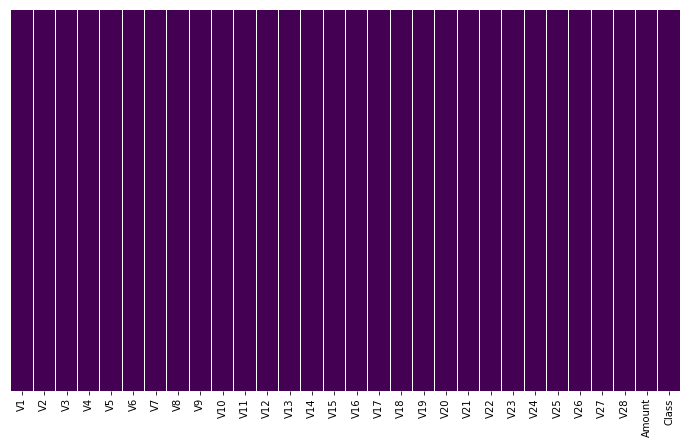

In [8]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

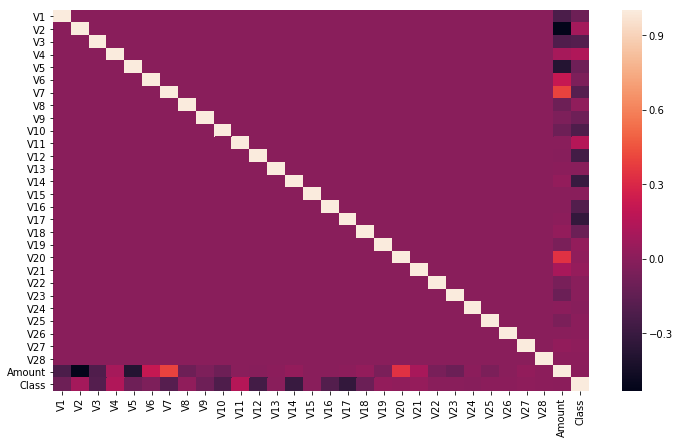

In [9]:
sns.heatmap(df.corr())

Text(0, 0.5, 'Frequency')

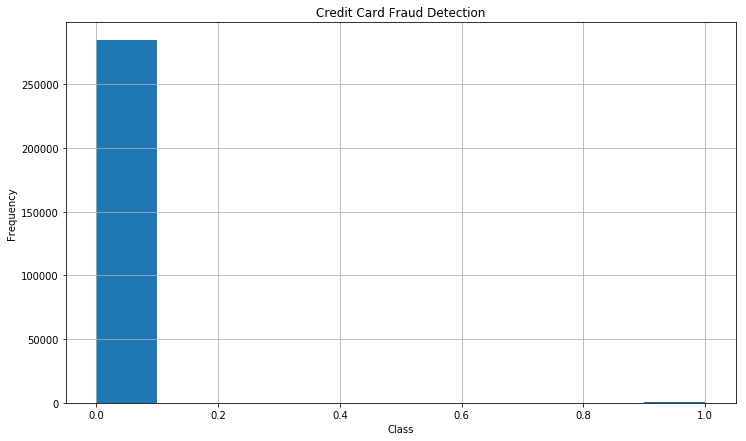

In [10]:
fig = df.Class.hist(bins=10)
fig.set_title('Credit Card Fraud Detection')
fig.set_xlabel('Class')
fig.set_ylabel('Frequency')

In [11]:
# sns.set_style('whitegrid')
# sns.countplot(x='Class', hue=None, data=df)

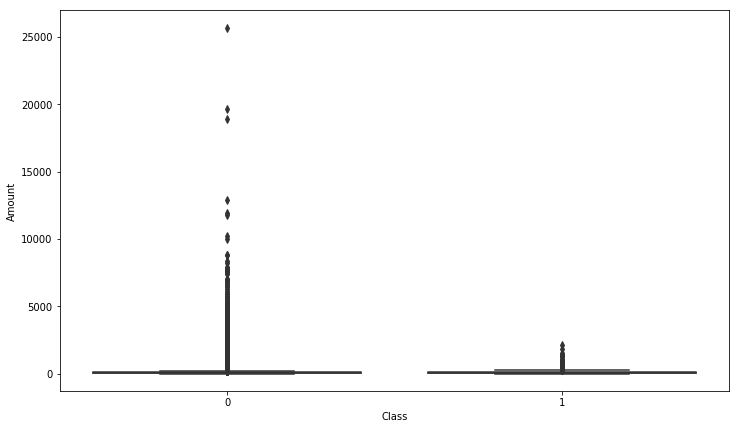

In [12]:
sns.boxplot(x='Class', y='Amount', data=df, palette='winter')

In [13]:
df.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,2.239751e-15,...,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619,0.001727
std,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


## Splitting dataframe into dependent & independent variables

In [14]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

## Splitting into training & test sets

In [15]:
# from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

## Standardizing the features

In [16]:
# from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Data Preprocessing Done!

## Logistic Regression

In [17]:
# from sklearn.linear_model import LogisticRegression
classifier1 = LogisticRegression(solver='lbfgs')
classifier1.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [18]:
y_pred1 = classifier1.predict(X_test)
y_pred1

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [19]:
y_test

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [20]:
# from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred1)

array([[14205,     3],
       [   11,    22]], dtype=int64)

In [21]:
# from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred1)

0.9990169229688927

In [22]:
# from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14208
           1       0.88      0.67      0.76        33

   micro avg       1.00      1.00      1.00     14241
   macro avg       0.94      0.83      0.88     14241
weighted avg       1.00      1.00      1.00     14241



In [23]:
# from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier1, X = X_train, y = y_train, cv = 10, n_jobs=-1)
print(accuracies.mean(), accuracies.std())

0.9992090662051145 0.00014801766074937176


## K-Nearest Neighbors (K-NN) Classifier

In [24]:
# from sklearn.neighbors import KNeighborsClassifier
classifier2 = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2, n_jobs=-1)
classifier2.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
           weights='uniform')

In [25]:
y_pred2 = classifier2.predict(X_test)
y_pred2

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [26]:
y_test

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [27]:
# from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred2)

array([[14207,     1],
       [    4,    29]], dtype=int64)

In [28]:
# from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred2)

0.9996489010603188

In [29]:
# from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14208
           1       0.97      0.88      0.92        33

   micro avg       1.00      1.00      1.00     14241
   macro avg       0.98      0.94      0.96     14241
weighted avg       1.00      1.00      1.00     14241



In [30]:
# # from sklearn.model_selection import cross_val_score
# accuracies = cross_val_score(estimator = classifier2, X = X_train, y = y_train, cv = 5, n_jobs=-1)
# print(accuracies.mean(), accuracies.std())

## Support Vector Machine (SVM)

In [31]:
# # from sklearn.svm import SVC
# classifier3 = SVC()
# classifier3.fit(X_train, y_train)

In [32]:
# y_pred3 = classifier3.predict(X_test)
# y_pred3

In [33]:
# y_test

In [34]:
# # from sklearn.metrics import confusion_matrix
# confusion_matrix(y_test, y_pred3)

In [35]:
# # from sklearn.metrics import accuracy_score
# accuracy_score(y_test, y_pred3)

In [36]:
# # from sklearn.metrics import classification_report
# print(classification_report(y_test, y_pred3))

In [37]:
# # from sklearn.model_selection import cross_val_score
# accuracies = cross_val_score(estimator = classifier3, X = X_train, y = y_train, cv = 10, n_jobs=-1)
# print(accuracies.mean(), accuracies.std())

## Naive Bayes

In [38]:
# from sklearn.naive_bayes import GaussianNB
classifier4 = GaussianNB()
classifier4.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [39]:
y_pred4 = classifier4.predict(X_test)
y_pred4

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [40]:
y_test

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [41]:
# from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred4)

array([[13907,   301],
       [    3,    30]], dtype=int64)

In [42]:
# from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred4)

0.9786531844673829

In [43]:
# from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred4))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     14208
           1       0.09      0.91      0.16        33

   micro avg       0.98      0.98      0.98     14241
   macro avg       0.55      0.94      0.58     14241
weighted avg       1.00      0.98      0.99     14241



In [44]:
# from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier4, X = X_train, y = y_train, cv = 10, n_jobs=-1)
print(accuracies.mean(), accuracies.std())

0.9775544647049361 0.000954126036787045


## Decision Tree Classification

In [45]:
# from sklearn.tree import DecisionTreeClassifier
classifier5 = DecisionTreeClassifier(criterion = 'entropy')
classifier5.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [46]:
y_pred5 = classifier5.predict(X_test)
y_pred5

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [47]:
y_test

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [48]:
# from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred5)

array([[14200,     8],
       [    5,    28]], dtype=int64)

In [49]:
# from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred5)

0.9990871427568289

In [50]:
# from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred5))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14208
           1       0.78      0.85      0.81        33

   micro avg       1.00      1.00      1.00     14241
   macro avg       0.89      0.92      0.91     14241
weighted avg       1.00      1.00      1.00     14241



In [51]:
# from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier5, X = X_train, y = y_train, cv = 5, n_jobs=-1)
print(accuracies.mean(), accuracies.std())

0.9991721067148491 0.00010800054814831325


In [52]:
# from IPython.display import Image
# from sklearn.externals.six import StringIO
# from sklearn.tree import export_graphviz
# import pydotplus

# dot_data = StringIO()
# export_graphviz(classifier5, out_file=dot_data, filled=True, rounded=True, special_characters=True)

# graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
# Image(graph.create_png())

## Random Forest Classifier

In [53]:
# from sklearn.ensemble import RandomForestClassifier
classifier6 = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', n_jobs=-1)
classifier6.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [54]:
y_pred6 = classifier6.predict(X_test)
y_pred6

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [55]:
y_test

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [56]:
# from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred6)

array([[14207,     1],
       [    3,    30]], dtype=int64)

In [57]:
# from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred6)

0.999719120848255

In [58]:
# from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred6))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14208
           1       0.97      0.91      0.94        33

   micro avg       1.00      1.00      1.00     14241
   macro avg       0.98      0.95      0.97     14241
weighted avg       1.00      1.00      1.00     14241



In [59]:
# from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier6, X = X_train, y = y_train, cv = 5, n_jobs=-1)
print(accuracies.mean(), accuracies.std())

0.9995269176056372 6.570097292308386e-05


## Principal Component Analysis (PCA)

### Unsupervised Algorithm

In [60]:
# from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
Xp_train = pca.fit_transform(X_train)
Xp_test = pca.transform(X_test)
print(pca.explained_variance_ratio_)

[0.06779537 0.03482699]


In [61]:
# from sklearn.decomposition import IncrementalPCA
ipca = IncrementalPCA(n_components = 2)
Xip_train = ipca.fit_transform(X_train)
Xip_test = ipca.transform(X_test)
print(ipca.explained_variance_ratio_)

[0.06546843 0.03418691]


In [62]:
# # from sklearn.decomposition import KernelPCA
# kpca = KernelPCA(n_components = 2)
# Xkp_train = kpca.fit_transform(X_train)
# Xkp_test = kpca.transform(X_test)
# print(kpca.explained_variance_ratio_)

In [63]:
# from sklearn.decomposition import TruncatedSVD
tsvd = TruncatedSVD(n_components = 2)
Xtsvd_train = tsvd.fit_transform(X_train)
Xtsvd_test = tsvd.transform(X_test)
print(tsvd.explained_variance_ratio_)

[0.06775165 0.03473681]


In [64]:
# Considering KNN Classifier & IncrementalPCA
classifier7 = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2, n_jobs=-1)
classifier7.fit(Xip_train, y_train)
y_pred7 = classifier7.predict(Xip_test)
confusion_matrix(y_test, y_pred7)

array([[14205,     3],
       [   28,     5]], dtype=int64)

Text(0, 0.5, 'PLX2')

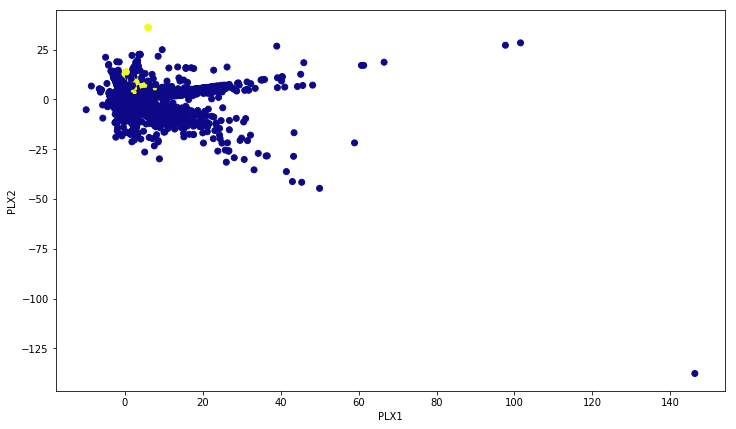

In [65]:
plt.scatter(Xip_train[:,0], Xip_train[:,1], c=y_train, cmap='plasma')
plt.xlabel('PLX1')
plt.ylabel('PLX2')

## Linear Discriminant Analysis (LDA)

### Supervised Algorithm

In [66]:
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components = 2)
Xl_train = lda.fit_transform(X_train, y_train)
Xl_test = lda.transform(X_test)
print(lda.explained_variance_ratio_)

[1.]


In [67]:
# Considering KNN Classifier & LDA
classifier8 = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2, n_jobs=-1)
classifier8.fit(Xl_train, y_train)
y_pred8 = classifier8.predict(Xl_test)
confusion_matrix(y_test, y_pred8)

array([[14207,     1],
       [    5,    28]], dtype=int64)

## Combined PCA & LDA

In [68]:
# from sklearn.decomposition import PCA
pca = PCA()
Xpl_train = pca.fit_transform(X_train)
Xpl_test = pca.transform(X_test)

# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=2)
Xpl_train = lda.fit_transform(Xpl_train, y_train)
Xpl_test = lda.transform(Xpl_test)
print(lda.explained_variance_ratio_)

[1.]


In [69]:
# Considering KNN Classifier & Combined_PCA_&_LDA
classifier9 = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2, n_jobs=-1)
classifier9.fit(Xpl_train, y_train)
y_pred9 = classifier9.predict(Xpl_test)
confusion_matrix(y_test, y_pred9)

array([[14207,     1],
       [    5,    28]], dtype=int64)

In [70]:
# plt.scatter(Xpl_train[:,0], Xpl_train[:,1], c=y_train, cmap='plasma')
# plt.xlabel('PLX1')
# plt.ylabel('PLX2')

## Gradient Boosting

In [71]:
# from lightgbm import LGBMClassifier
classifier10 = LGBMClassifier()
classifier10.fit(Xpl_train, y_train)

# from sklearn.ensemble import AdaBoostClassifier
classifier11 = AdaBoostClassifier()
classifier11.fit(Xpl_train, y_train)

# from sklearn.ensemble import GradientBoostingClassifier
classifier12 = GradientBoostingClassifier()
classifier12.fit(Xpl_train, y_train)

# from xgboost import XGBClassifier
classifier13 = XGBClassifier(n_jobs=-1, learning_rate=0.01)
classifier13.fit(Xpl_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.01,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=-1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [72]:
y_pred13 = classifier13.predict(Xpl_test)
y_pred13

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [73]:
y_test

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [74]:
# from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred13)

array([[14203,     5],
       [    4,    29]], dtype=int64)

In [75]:
# from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred13)

0.9993680219085739

In [76]:
# from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred13))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14208
           1       0.85      0.88      0.87        33

   micro avg       1.00      1.00      1.00     14241
   macro avg       0.93      0.94      0.93     14241
weighted avg       1.00      1.00      1.00     14241



In [77]:
# # from sklearn.model_selection import cross_val_score
# accuracies = cross_val_score(estimator = classifier13, X = X_train, y = y_train, cv = 5, n_jobs=-1)
# print(accuracies.mean(), accuracies.std())